Waste Management Using CNN

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import os


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Activation,Dropout,Flatten, Dense, BatchNormalization)
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob


In [5]:
train_path = "DATASET/TRAIN"
test_path = "DATASET/TEST"


In [6]:
x_data = []
y_data = []

for category in glob(os.path.join(train_path, "*")):
    for file in tqdm(glob(os.path.join(category, "*"))):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(os.path.basename(category))

data = pd.DataFrame({'image': x_data, "label": y_data})


100%|██████████| 8058/8058 [00:13<00:00, 592.35it/s]


In [7]:
print(f"Data shape: {data.shape}")


Data shape: (20623, 2)


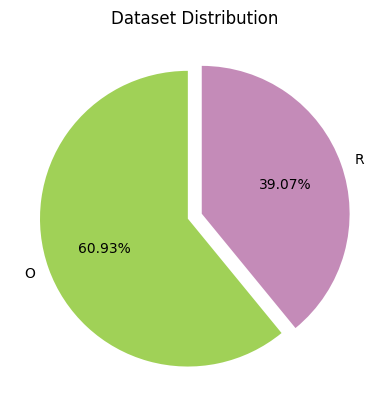

In [8]:
colors = ["#a0d157", "#c48bb8"]
plt.pie(data['label'].value_counts(), 
        labels=data['label'].value_counts().index, 
        autopct='%0.2f%%', 
        colors=colors, 
        startangle=90, 
        explode=[0.05] * len(data['label'].value_counts()))
plt.title("Dataset Distribution")
plt.show()

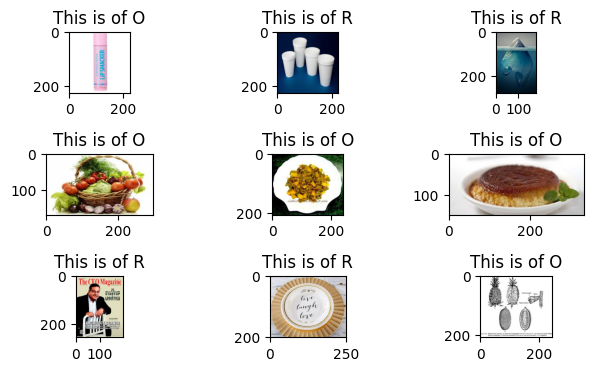

In [9]:
plt.Figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3, i%12+1)
    index = np.random.randint(20000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

CNN - Convolutional neural Network

In [11]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss ="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

batch_size=256



In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
train_generator = train_datagen.flow_from_directory(
    train_path, 
    target_size = (224, 224),
    batch_size = batch_size, 
    color_mode = "rgb", 
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 20623 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [16]:
hist = model.fit(
    train_generator, 
    epochs=10, 
    validation_data=test_generator
)


Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 289s 3s/step - accuracy: 0.7098 - loss: 0.7492 - val_accuracy: 0.8639 - val_loss: 0.3590
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1086s 14s/step - accuracy: 0.8310 - loss: 0.4149 - val_accuracy: 0.8647 - val_loss: 0.3363
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 303s 4s/step - accuracy: 0.8487 - loss: 0.3710 - val_accuracy: 0.8846 - val_loss: 0.3026
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 389s 5s/step - accuracy: 0.8580 - loss: 0.3442 - val_accuracy: 0.8778 - val_loss: 0.3069
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 263s 3s/step - accuracy: 0.8647 - loss: 0.3305 - val_accuracy: 0.8826 - val_loss: 0.2987
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.8705 - loss: 0.3195 - val_accuracy: 0.9001 - val_loss: 0.2683
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 264s 3s/step - accuracy: 0.8892 - loss: 0.2726 - val_accuracy: 0.8707 - val_loss: 0.3619
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 263s 3s/step - accuracy: 0.9042 - loss: 0.2451 - val_accuracy: 0.8563 -